In [47]:
from pandas import read_pickle
import numpy as np
from numpy.linalg import det
import matplotlib.pyplot as plt
from math import pi, log, e

# Importing data
radiation = read_pickle('Radiation.pkl')

# Setting up arrays for time, radiation, and background radiation and error for each
t = arange(0,35.8167,1.35)
y = radiation['Count rate'].values*60
yerr = sqrt(y)

# Creating a fit line with the parameters
def fit_line(t,A1,A2,λ1,λ2,B):
    fit = A1*(e**(-λ1*t))+ A2*(e**(-λ2*t)) + B
    return fit

a1 = 3000
a2 = -2000
λ1 = 0.1
λ2 = 0.1
B = 100



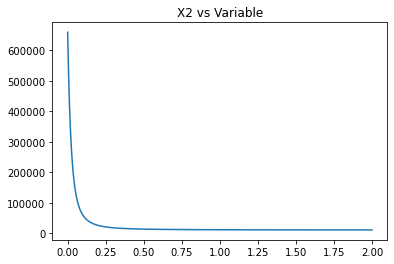

In [135]:
# This block of code was to help me make sure that my grid search program wasn't 
# finding a local minimum

a1 = linspace(4690,5000,20000)
a2 = linspace(4670,8000,20000)
λ1 = linspace(0,2,2000)
λ2 = linspace(0.1,0.2,2000)
B = linspace(600,800,2000)

chisq = array([])
for i in λ1:
    fit = fit_line(t,a1[0],a2[0],i,λ2[0],B[0])
    chi2 = sum(((y - fit)**2)/((yerr)**2))
    chisq = append(chisq, chi2)

plt.title('X2 vs Variable') # In this case its Gamma2
plt.plot(λ1,chisq)

In [164]:
Thalf = log(2)/λ1
print(Thalf)

3.465735902799726


In [49]:
# Importing data
radiation = read_pickle('Radiation.pkl')

# Setting up arrays for time, radiation, and background radiation and error for each
t = arange(0,35.8167,1.35)
y = radiation['Count rate'].values*60
yerr = sqrt(y)


# Creating a fit line with the parameters
def fit_line(t,A,λ,B):
    fit = A*(np.exp(-λ*t)) + B
    return fit


#a1  = 3000
#λ = 0.12
#B = 600


def chi_squared(y, t, A, B, λ):
    y_values=fit_line(t, A, λ, B)
    return np.sum((y-y_values)**2 / yerr**2)

def grid_search(y, t, A_range, B_range, λ_range, step_size, step_size2):
    best_params= None
    best_chi_squared = float('inf')
    
    for A in np.arange(A_range[0], A_range[1], step_size):
        for B in np.arange(B_range[0], B_range[1], step_size):
            for λ in np.arange(λ_range[0], λ_range[1], step_size2):
                
                current_chi_squared = chi_squared(y, t, A, B, λ)
                
                if current_chi_squared < best_chi_squared:
                    best_chi_squared = current_chi_squared
                    best_params = (A, B, λ)
                    
        
    return best_params, best_chi_squared

A_range=(2000, 4000)
B_range=(100,700)
λ_range=(0, 1)
step_size= 1
step_size2= .01



best_params = grid_search(y, t, A_range, B_range, λ_range, step_size, step_size2)
print("Best Parameters (A, B, λ) and Chi_Squared", best_params)

Best Parameters (A, B, λ) and Chi_Squared ((3999, 670, 0.15), 819.3841176847774)


In [44]:
Thalf = log(2)/.15
print(Thalf)

4.620981203732969
